In [63]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from netCDF4 import num2date
import seaborn as sns
import cftime
import math
%matplotlib inline

In [65]:
# 读取文件，检查数据
co2_sea = pd.read_csv("co2_annmean_gl.csv", skiprows=37)
#print(co2_sea.head(40))
#co2_sea.info()

co2_emi = pd.read_csv("global.1751_2014.ems", skiprows=33, sep=r'\s+')
#print(co2_emi.head())
#co2_emi.info()

co2_atm = pd.read_csv("co2_annmean_mlo.csv", skiprows=43)
#print(co2_atm.head(40))
#co2_atm.info()

co2_land = pd.read_excel("Global_land-use_flux-1850_2005.xls")
#print(co2_land.head(40))
#co2_land.info()

In [67]:
#定义转移系数
K_12 = 105/740
K_21 = 102/900

#创建空表格
co2_cal_12 = pd.DataFrame(columns=['year', 'co2_sea_pgc', 'co2_atm_pgc', 'co2_gamma'])

#填充年份列
years = range(1986, 2005)
co2_cal_12['year'] = years

#定义初始值（与论文使用相同）
co2_sea_1986 = 900
co2_atm_1986 = 740

#填充海平面列
co2_cal_12['co2_sea_pgc'] = 0.00
co2_cal_12.loc[co2_cal_12['year'] == 1986, 'co2_sea_pgc'] = co2_sea_1986

#填充大气列
co2_cal_12['co2_atm_pgc'] = 0.00
co2_cal_12.loc[co2_cal_12['year'] == 1986, 'co2_atm_pgc'] = co2_atm_1986

#填充排放列（进行单位转换）
for years in range(1986, 2005):
    co2_cal_12.loc[co2_cal_12['year'] == years, 'co2_gamma'] = co2_emi.loc[co2_emi['Year'] == years, 'Total'].values/1000
#print(co2_cal_12.head())

#使用公式创建两箱模型
for years in range(1987, 2005):
    
    #获取用于计算的数值
    N1 = co2_cal_12.loc[co2_cal_12['year'] == years-1, 'co2_atm_pgc'].values[0]
    #print(f"The N1 is: {N1}")
    N2 = co2_cal_12.loc[co2_cal_12['year'] == years-1, 'co2_sea_pgc'].values[0]
    #print(f"The N2 is: {N2}")
    gamma = co2_cal_12.loc[co2_cal_12['year'] == years, 'co2_gamma'].values[0]

    #进行计算
    N1_new = N1 - K_12*N1 + K_21*N2 + gamma
    #print(f"The new N1 is: {N1_new}")
    N2_new = N2 + K_12*N1 - K_21*N2
    #print(f"The new N2 is: {N2_new}")

    #更新数值
    co2_cal_12.loc[co2_cal_12['year'] == years, 'co2_atm_pgc'] = N1_new
    co2_cal_12.loc[co2_cal_12['year'] == years, 'co2_sea_pgc'] = N2_new

#单位换算
co2_cal_12['co2_sea_cal_ppm'] = co2_cal_12['co2_sea_pgc']/2.13
co2_cal_12['co2_atm_cal_ppm'] = co2_cal_12['co2_atm_pgc']/2.13

#检查结果
print(co2_cal_12)

    year  co2_sea_pgc  co2_atm_pgc co2_gamma  co2_sea_cal_ppm  co2_atm_cal_ppm
0   1986   900.000000   740.000000     5.583       422.535211       347.417840
1   1987   903.000000   742.725000     5.725       423.943662       348.697183
2   1988   906.046655   745.614345     5.936       425.374017       350.053683
3   1989   909.157998   748.569002     6.066       426.834741       351.440846
4   1990   912.335963   751.465037     6.074       428.326743       352.800487
5   1991   915.564683   754.378317     6.142       429.842574       354.168224
6   1992   918.840852   757.180148     6.078       431.380682       355.483637
7   1993   922.143279   759.947721      6.07       432.931117       356.782967
8   1994   925.464128   762.800872     6.174       434.490201       358.122475
9   1995   928.813452   765.756548     6.305       436.062654       359.510116
10  1996   932.202573   768.815427     6.448       437.653790       360.946210
11  1997   935.641623   771.932377     6.556       4

In [101]:
#定义转移系数
K_12 = 105/740
K_21 = 102/900

#创建空表格
co2_cal_34 = pd.DataFrame(columns=['year', 'co2_sea_pgc', 'co2_atm_pgc', 'co2_gamma'])

#填充年份列
years = range(1986, 2005)
co2_cal_34['year'] = years 

#定义初始值（与论文使用相同）
co2_sea_1986 = 900
co2_atm_1986 = 740

#填充海平面列
co2_cal_34['co2_sea_pgc'] = 0.00
co2_cal_34.loc[co2_cal_34['year'] == 1986, 'co2_sea_pgc'] = co2_sea_1986

#填充大气列
co2_cal_34['co2_atm_pgc'] = 0.00
co2_cal_34.loc[co2_cal_34['year'] == 1986, 'co2_atm_pgc'] = co2_atm_1986

#填充排放列（进行单位转换）
for years in range(1986, 2005):
    co2_cal_34.loc[co2_cal_34['year'] == years, 'co2_gamma'] = co2_emi.loc[co2_emi['Year'] == years, 'Total'].values/1000
#print(co2_cal_34.head())

#使用公式创建两箱模型（有缓冲效应）
for years in range(1987, 2005):
     
    #获取用于计算的数值
    N1 = co2_cal_34.loc[co2_cal_34['year'] == years-1, 'co2_atm_pgc'].values[0]
    #print(f"The N1 is: {N1}")
    N2 = co2_cal_34.loc[co2_cal_34['year'] == years-1, 'co2_sea_pgc'].values[0]
    #print(f"The N2 is: {N2}")
    gamma = co2_cal_34.loc[co2_cal_34['year'] == years, 'co2_gamma'].values[0]

    #计算缓冲系数
    z = N1/2.13
    alpha = 3.69 + 1.86e-2*z - 1.80e-6*z**2
    #print(alpha)

    #进行计算
    N1_new = N1 - K_12*N1 + K_21*(821+alpha*(N2-821)) + gamma
    #print(f"The new N1 is: {N1_new}")
    N2_new = N2 + K_12*N1 - K_21*(821+alpha*(N2-821))
    #print(f"The new N2 is: {N2_new}")

    #更新数值
    co2_cal_34.loc[co2_cal_34['year'] == years, 'co2_atm_pgc'] = N1_new
    co2_cal_34.loc[co2_cal_34['year'] == years, 'co2_sea_pgc'] = N2_new

#进行单位换算
co2_cal_34['co2_sea_cal_ppm'] = co2_cal_34['co2_sea_pgc']/2.13
co2_cal_34['co2_atm_cal_ppm'] = co2_cal_34['co2_atm_pgc']/2.13

#检查结果
print(co2_cal_34)

    year  co2_sea_pgc  co2_atm_pgc co2_gamma  co2_sea_cal_ppm  co2_atm_cal_ppm
0   1986   900.000000   740.000000     5.583       422.535211       347.417840
1   1987   823.004533   822.720467     5.725       386.387105       386.253740
2   1988   844.285806   807.375194     5.936       396.378313       379.049387
3   1989   838.137326   819.589674     6.066       393.491702       384.783885
4   1990   840.834071   822.966929     6.074       394.757780       386.369450
5   1991   840.714953   829.228047     6.142       394.701856       389.308942
6   1992   841.514449   834.506551     6.078       395.077206       391.787113
7   1993   841.998109   840.092891      6.07       395.304276       394.409808
8   1994   842.580597   845.684403     6.174       395.577745       397.034931
9   1995   843.136798   851.433202     6.305       395.838872       399.733897
10  1996   843.712244   857.305756     6.448       396.109035       402.490965
11  1997   844.292417   863.281583     6.556       3

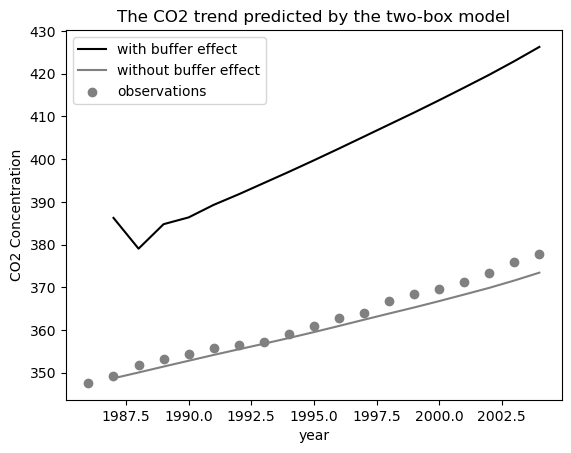

In [99]:
# 创建一个图形
plt.figure()

#画折线图（有缓冲）
plt.plot(co2_cal_34[co2_cal_34['year'] != 1986]['year'],
         co2_cal_34[co2_cal_34['year'] != 1986]['co2_atm_cal_ppm'],
         label='with buffer effect', color='black')

#画折线图（无缓冲）
plt.plot(co2_cal_12[co2_cal_12['year'] != 1986]['year'],
         co2_cal_12[co2_cal_12['year'] != 1986]['co2_atm_cal_ppm'],
         label='without buffer effect', color='grey')

#填充观测值
for years in range(1986, 2005):
    co2_cal_12.loc[co2_cal_12['year'] == years, 'co2_atm_obs_ppm'] = co2_atm.loc[co2_atm['year'] == years, 'mean'].values

#画散点图（实测值）
plt.scatter(co2_cal_12['year'], co2_cal_12['co2_atm_obs_ppm'], label='observations', color='grey')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('The CO2 trend predicted by the two-box model')
plt.xlabel('year')
plt.ylabel('CO2 Concentration')

# 显示图形
plt.show()

In [105]:
#定义转移系数
K12 = 60/615
K21 = 60/842
K23 = 9/842
K24 = 43/842
K32 = 52/9744
K34 = 162/9744
K43 = 205/26280
K45 = 0.2/26280
K51 = 0.2/90000000
K67 = 62/731
K71 = 62/1328

#定义功能，计算缓冲系数
def buffer(i):
    alpha = 3.69 + 1.86e-2*i - 1.80e-6*i**2
    return alpha

#定义功能，计算生产力
def bio(i,beta):
    f = 62*(1+beta*math.log(i/289))
    return f
    
#生成新表格
co2_cal_513 = pd.DataFrame(columns=['year', 'co2_atm_pgc', 'co2_sea_pgc', 'co2_mesea', 
                                    'co2_desea', 'co2_sedi', 'co2_bio','co2_soil', 
                                    'co2_gamma', 'co2_landuse'])

#填充年份
years = range(1750, 2001)
co2_cal_513['year'] = years

#填充土地使用排放值（来源于原文的引用）
for years in range(1850, 2001):
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_landuse'] = co2_land.loc[co2_land['Year'] == years, 'Global'].values/1000

#使用插值填充未记录的土地使用排放值（与原文相同）
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_landuse'] = 0.2
co2_cal_513.loc[co2_cal_513['year'] == 1849, 'co2_landuse'] = 0.5
co2_cal_513['co2_landuse'] = pd.to_numeric(co2_cal_513['co2_landuse'], errors='coerce')
co2_cal_513['co2_landuse'] = co2_cal_513['co2_landuse'].interpolate(method='linear', limit_direction='both', axis=0)

#填充排放值
for years in range(1751, 2001):
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_gamma'] = co2_emi.loc[co2_emi['Year'] == years, 'Total'].values/1000
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_gamma'] = 0.003

#填充各box初始值
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_atm_pgc'] = 616
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_sea_pgc'] = 842
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_mesea'] = 9744
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_desea'] = 26280
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_sedi'] = 90000000
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_bio'] = 731
co2_cal_513.loc[co2_cal_513['year'] == 1750, 'co2_soil'] = 1238

#使用公式创建七箱模型
for years in range(1751, 2001):

    #获取数值
    N1 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_atm_pgc'].values[0]
    #print(f"The N1 is: {N1}")
    N2 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_sea_pgc'].values[0]
    #print(f"The N2 is: {N2}")
    N3 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_mesea'].values[0]
    #print(f"The N3 is: {N3}")
    N4 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_desea'].values[0]
    N5 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_sedi'].values[0]
    N6 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_bio'].values[0]
    N7 = co2_cal_513.loc[co2_cal_513['year'] == years-1, 'co2_soil'].values[0]
    gamma = co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_gamma'].values[0]
    land = co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_landuse'].values[0]

    #计算各效应
    z = N1/2.13
    bu = buffer(z)
    biolo = bio(z,0.38)

    #代入公式进行计算
    N1_new = N1 - K12*N1 + K21*(821+bu*(N2-821)) + gamma - biolo + land + K51*N5 + K71*N7
    #print(f"The new N1 is: {N1_new}")
    N2_new = N2 + K12*N1 - K21*(821+bu*(N2-821)) - K23*N2 + K32*N3 - K24*N2
    N3_new = N3 + K23*N2 - K32*N3 - K34*N3 + K43*N4
    N4_new = N4 + K34*N3 - K43*N4 + K24*N2 - K45*N4
    N5_new = N5 + K45*N4 - K51*N5
    N6_new = N6 + biolo - K67*N6 - 2*land
    N7_new = N7 + K67*N6 - K71*N7 + land
    #print(f"The new N2 is: {N2_new}")

    #更新数值
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_atm_pgc'] = N1_new
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_sea_pgc'] = N2_new
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_mesea'] = N3_new
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_desea'] = N4_new
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_sedi'] = N5_new
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_bio'] = N6_new
    co2_cal_513.loc[co2_cal_513['year'] == years, 'co2_soil'] = N7_new

#换算单位并检查
co2_cal_513['co2_sea_cal_ppm'] = co2_cal_513['co2_sea_pgc']/2.13
co2_cal_513['co2_atm_cal_ppm'] = co2_cal_513['co2_atm_pgc']/2.13
#print(co2_cal_513)

In [93]:
#使用不同β计算
co2_cal_513_2 = pd.DataFrame(columns=['year', 'co2_atm_pgc', 'co2_sea_pgc', 'co2_mesea', 
                                    'co2_desea', 'co2_sedi', 'co2_bio','co2_soil', 
                                    'co2_gamma', 'co2_landuse'])

years = range(1750, 2001)
co2_cal_513_2['year'] = years

for years in range(1850, 2001):
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_landuse'] = co2_land.loc[co2_land['Year'] == years, 'Global'].values/1000

co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_landuse'] = 0.2
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1849, 'co2_landuse'] = 0.5
co2_cal_513_2['co2_landuse'] = pd.to_numeric(co2_cal_513_2['co2_landuse'], errors='coerce')
co2_cal_513_2['co2_landuse'] = co2_cal_513_2['co2_landuse'].interpolate(method='linear', limit_direction='both', axis=0)

for years in range(1751, 2001):
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_gamma'] = co2_emi.loc[co2_emi['Year'] == years, 'Total'].values/1000
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_gamma'] = 0.003

co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_atm_pgc'] = 616
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_sea_pgc'] = 842
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_mesea'] = 9744
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_desea'] = 26280
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_sedi'] = 90000000
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_bio'] = 731
co2_cal_513_2.loc[co2_cal_513_2['year'] == 1750, 'co2_soil'] = 1238

for years in range(1751, 2001):
    N1 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_atm_pgc'].values[0]
    #print(f"The N1 is: {N1}")
    N2 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_sea_pgc'].values[0]
    #print(f"The N2 is: {N2}")
    N3 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_mesea'].values[0]
    #print(f"The N3 is: {N3}")
    N4 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_desea'].values[0]
    N5 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_sedi'].values[0]
    N6 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_bio'].values[0]
    N7 = co2_cal_513_2.loc[co2_cal_513_2['year'] == years-1, 'co2_soil'].values[0]
    
    gamma = co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_gamma'].values[0]
    land = co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_landuse'].values[0]
    
    z = N1/2.13
    bu = buffer(z)
    biolo = bio(z,0.50)
    
    N1_new = N1 - K12*N1 + K21*(821+bu*(N2-821)) + gamma - biolo + land + K51*N5 + K71*N7
    #print(f"The new N1 is: {N1_new}")
    N2_new = N2 + K12*N1 - K21*(821+bu*(N2-821)) - K23*N2 + K32*N3 - K24*N2
    N3_new = N3 + K23*N2 - K32*N3 - K34*N3 + K43*N4
    N4_new = N4 + K34*N3 - K43*N4 + K24*N2 - K45*N4
    N5_new = N5 + K45*N4 - K51*N5
    N6_new = N6 + biolo - K67*N6 - 2*land
    N7_new = N7 + K67*N6 - K71*N7 + land
    
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_atm_pgc'] = N1_new
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_sea_pgc'] = N2_new
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_mesea'] = N3_new
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_desea'] = N4_new
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_sedi'] = N5_new
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_bio'] = N6_new
    co2_cal_513_2.loc[co2_cal_513_2['year'] == years, 'co2_soil'] = N7_new
co2_cal_513_2['co2_sea_cal_ppm'] = co2_cal_513_2['co2_sea_pgc']/2.13
co2_cal_513_2['co2_atm_cal_ppm'] = co2_cal_513_2['co2_atm_pgc']/2.13
#print(co2_cal_513_2)

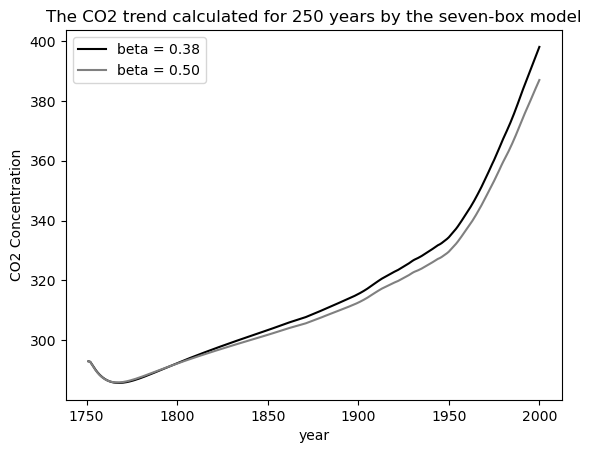

In [97]:
# 创建一个图形
plt.figure()

plt.plot(co2_cal_513[co2_cal_513['year'] != 1750]['year'],
         co2_cal_513[co2_cal_513['year'] != 1750]['co2_atm_cal_ppm'],
         label='beta = 0.38', color='black')

plt.plot(co2_cal_513_2[co2_cal_513['year'] != 1750]['year'],
         co2_cal_513_2[co2_cal_513['year'] != 1750]['co2_atm_cal_ppm'],
         label='beta = 0.50', color='grey')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('The CO2 trend calculated for 250 years by the seven-box model')
plt.xlabel('year')
plt.ylabel('CO2 Concentration')

# 显示图形
plt.show()